## Loading MNIST dataset
The MNIST dataset (a classic in the Machine Learning community) has been around almost as long as the field itself and has been intensively studied. 

It’s a set of 60,000 training images, plus 10,000 test images, assembled by the National Institute of Standards and Technology (the NIST in MNIST) in the 1980s. 


In [1]:
# Loading the MNIST dataset in Keras
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [2]:
# Having a look at Training Data
print(train_images.shape)
print(len(train_labels))
print(train_labels)

(60000, 28, 28)
60000
[5 0 4 ... 5 6 8]


In [3]:
# Having a look at Test Data
print(test_images.shape)
print(len(test_labels))
print(test_labels)

(10000, 28, 28)
10000
[7 2 1 ... 4 5 6]


In [4]:
# Exemining one specific image
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

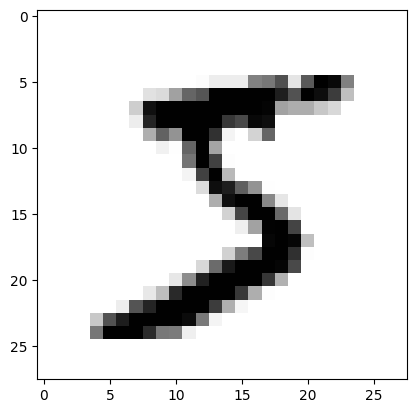

In [5]:
# Displaying the item from the training dataset
import matplotlib.pyplot as plt

digit = train_images[0]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [6]:
type(train_images[0])

numpy.ndarray

In [7]:
train_images[0].shape

(28, 28)

## 1. Densely connected NN

In [8]:
# NN Architecture
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
 layers.Dense(512, activation="relu"),
 layers.Dense(10, activation="softmax")
])

In [9]:
# Compilation step
model.compile(optimizer="rmsprop",
 loss="sparse_categorical_crossentropy",
 metrics=["accuracy"])

In [10]:
# Preparing the image data
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

In [11]:
# Fitting the model
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 7s 4ms/step - loss: 0.2660 - accuracy: 0.9224
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.1083 - accuracy: 0.9684
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0709 - accuracy: 0.9786
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0511 - accuracy: 0.9842
Epoch 5/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0387 - accuracy: 0.9882


In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [13]:
# Using the model to make predictions
test_digits = test_images[0:10]
predictions = model.predict(test_digits)
predictions[0]

1/1 [==============================] - 0s 117ms/step


array([1.2292465e-08, 2.8159086e-09, 8.1241029e-07, 1.1121714e-04,
       3.1175284e-12, 5.4512020e-07, 5.7238578e-13, 9.9988723e-01,
       1.0728777e-08, 1.3684279e-07], dtype=float32)

In [14]:
predictions[0].argmax() 

7

In [15]:
predictions[0][7] 

0.9998872

In [16]:
test_labels[0] 

7

In [17]:
# Evaluating the model on new data
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")

313/313 [==============================] - 1s 3ms/step - loss: 0.0672 - accuracy: 0.9802
test_acc: 0.9801999926567078


In [18]:
# To see the weights of a trained model, let's use the get_weights() method:
weights = model.get_weights()

# 'weights' is a list containing weight tensors
for layer_weights in weights:
    print(layer_weights)

[[ 0.03679921 -0.00789531 -0.02256847 ... -0.04634014 -0.06720697
   0.05196348]
 [-0.06610186  0.02799819 -0.02855833 ... -0.06683563  0.05852701
   0.01012752]
 [-0.00673397  0.02924541 -0.04386239 ... -0.04081884 -0.01147378
   0.00655305]
 ...
 [-0.02423524 -0.01260245  0.02502007 ...  0.03788756  0.04285967
  -0.02574914]
 [-0.00101351 -0.06365587 -0.0460047  ... -0.00656167  0.0011986
   0.04141879]
 [-0.01393579 -0.05877126  0.00439227 ... -0.05816384 -0.06724453
  -0.02673821]]
[-0.0037715  -0.00364757 -0.0446607   0.01762941  0.01058629  0.00671839
 -0.00523048  0.03934785 -0.04816275  0.12910672  0.02250418 -0.02022538
  0.0937533  -0.03332166  0.00203681  0.07908489  0.05108502  0.00925265
  0.04460231  0.00071596  0.02861059 -0.01109354  0.01744151  0.02736165
  0.01306708 -0.03812174  0.04018967  0.05522989  0.00571441 -0.03918235
  0.04275898 -0.00629586  0.02457766  0.03878896 -0.00628581  0.05308643
  0.00459092  0.04072545  0.06094897  0.02092604  0.03471648  0.0145751

In [19]:
len(weights)

4

In [20]:
for layer_weights in weights:
    print(layer_weights.shape)

(784, 512)
(512,)
(512, 10)
(10,)


## 2. Small ConvNet

In [21]:
from tensorflow import keras
from tensorflow.keras import layers

# Instantiating a small ConvNet 
inputs = keras.Input(shape=(28, 28, 1))   # input tensors shape: (image_height, image_width, image_channels)
                                          # image_channels = depth = 1 in this case (levels of gray)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)      #  flatten the 3D outputs to 1D with a Flatten layer before adding the Dense layers
outputs = layers.Dense(10, activation="softmax")(x)     # the last layer has 10 outputs and a softmax activation.

model = keras.Model(inputs=inputs, outputs=outputs)

In [22]:
# Displaying the model’s summary
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856 

The output of every Conv2D and MaxPooling2D layer is a rank-3 tensor of shape (height, width, channels). The width and height dimensions tend to shrink as you go deeper in the model. 

The number of channels is controlled by the first argument passed to the Conv2D layers (32, 64, or 128).

In [23]:
# Training the convnet on MNIST images
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
 
# Preparing the image data the same way as above
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype("float32") / 255

model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 6s 4ms/step - loss: 0.1596 - accuracy: 0.9512
Epoch 2/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0436 - accuracy: 0.9871
Epoch 3/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0310 - accuracy: 0.9903
Epoch 4/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0226 - accuracy: 0.9932
Epoch 5/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0175 - accuracy: 0.9947


In [24]:
# Evaluating the convnet
test_loss, test_acc = model.evaluate(test_images, test_labels) 
print(f"Test accuracy: {test_acc:.3f}")

313/313 [==============================] - 1s 3ms/step - loss: 0.0289 - accuracy: 0.9913
Test accuracy: 0.991
